In [ ]:
S!unzip '/content/drive/MyDrive/kaggle/archive.zip'

In [ ]:
import os
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report,roc_auc_score
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
def plot_loss_acc(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [ ]:
def rocauc_score(true_labels,predicted_labels):
    tloh = tf.one_hot(true_labels, depth=38)
    ploh = tf.one_hot(predicted_labels, depth=38)
    roc_auc = roc_auc_score(tloh,ploh)
    #receiver operating characteristic curve
    print("ROC AUC SCORE: ",roc_auc)

In [ ]:
from sklearn.metrics import roc_curve, auc
def plot_roc_auc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob,pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title("Roc_Auc Curve")
    plt.plot([0,1],[0,1],color="navy",lw=2,linestyle="--")

In [ ]:
def plot_confusion_matrix(true_labels,predicted_labels,history):
    class_names = [i for i in range(38)]
    cm = confusion_matrix(true_labels,predicted_labels)
    plt.figure(figsize=(12, 12))
    ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
    ax.set_ylabel('Actual', fontsize=40)
    ax.set_xlabel('Predicted', fontsize=40)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

In [ ]:
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNet, DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def create_model(base_model, optimizer):
    base_model.trainable = True
    model = tf.keras.Sequential([
        tf.keras.layers.Rescaling(scale=1/255, input_shape=(224, 224, 3)),
        base_model,

        GlobalAveragePooling2D(),

        Dense(128,activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(64,activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(38, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
plant_village='/content/plantvillage dataset/color'

In [ ]:
train, test = tf.keras.utils.image_dataset_from_directory(plant_village,
                                                         image_size=(224,224),
                                                         batch_size=32,
                                                         seed=123,
                                                         validation_split=0.2,
                                                         subset='both')

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


Epoch 1/20
1358/1358 [==============================] - 411s 265ms/step - loss: 3.2128 - accuracy: 0.1599 - val_loss: 3.2086 - val_accuracy: 0.1460
Epoch 2/20
1358/1358 [==============================] - 373s 275ms/step - loss: 2.9226 - accuracy: 0.2067 - val_loss: 27.5341 - val_accuracy: 0.2136
Epoch 3/20
1358/1358 [==============================] - 352s 259ms/step - loss: 2.7472 - accuracy: 0.2188 - val_loss: 4.0413 - val_accuracy: 0.2429
Epoch 4/20
1358/1358 [==============================] - 352s 259ms/step - loss: 2.6676 - accuracy: 0.2246 - val_loss: 3.7201 - val_accuracy: 0.2164
Epoch 5/20
1358/1358 [==============================] - 369s 272ms/step - loss: 2.4377 - accuracy: 0.2895 - val_loss: 4.0242 - val_accuracy: 0.2735
Epoch 6/20
1358/1358 [==============================] - 351s 258ms/step - loss: 2.0715 - accuracy: 0.3882 - val_loss: 2.7201 - val_accuracy: 0.4694
Epoch 7/20
1358/1358 [==============================] - 351s 258ms/step - loss: 1.8949 - accuracy: 0.4287 - val

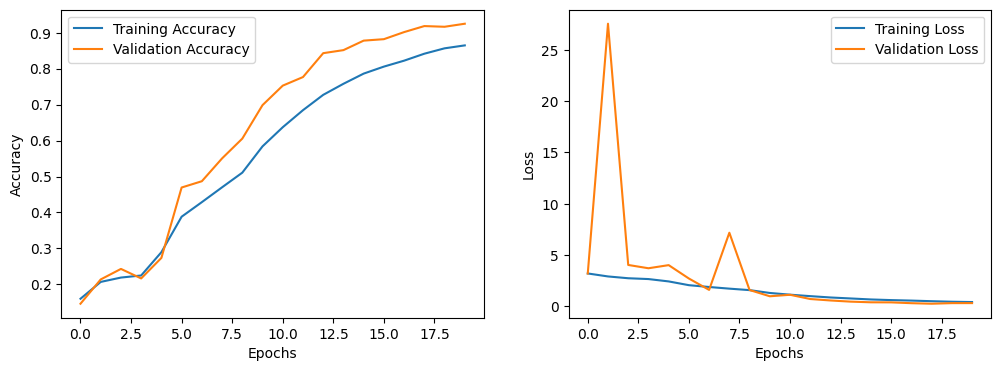

ROC AUC SCORE:  0.8252802130751378


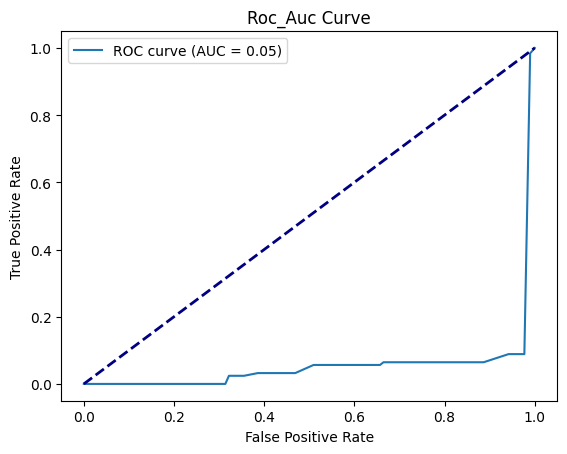

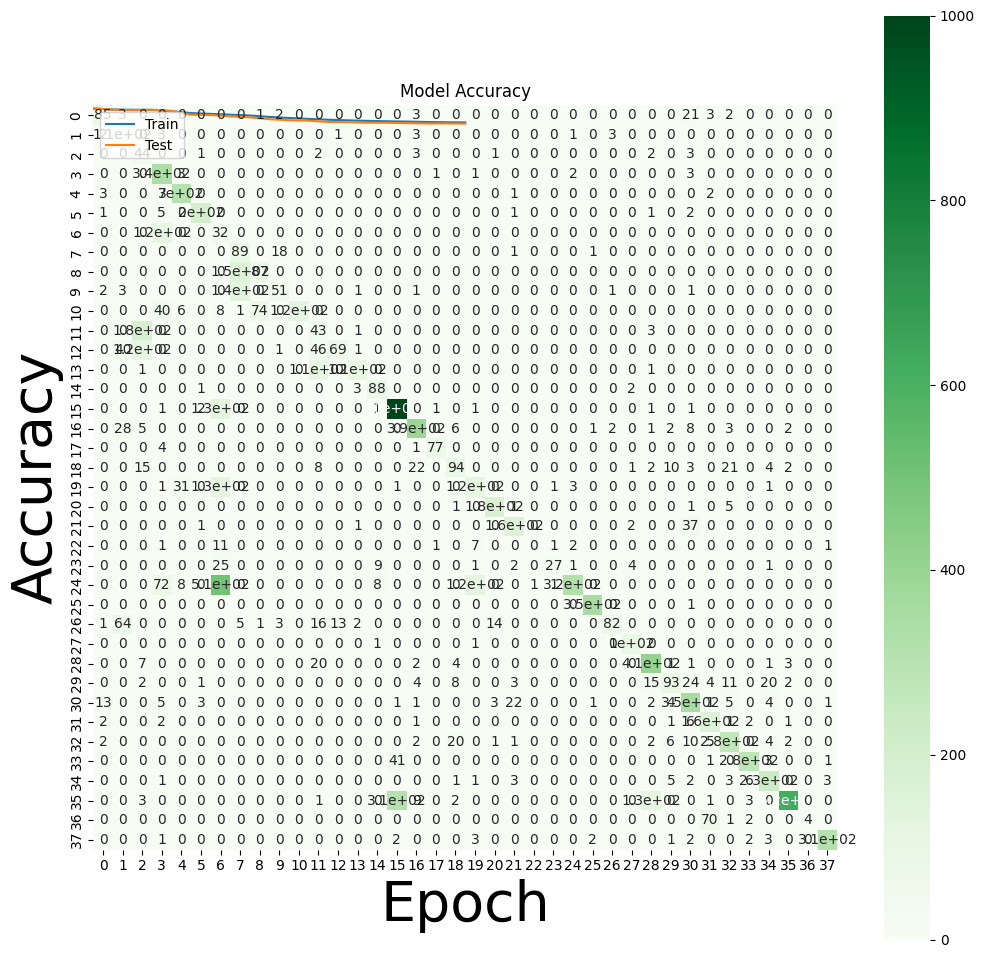

In [ ]:
l = tf.keras.optimizers.schedules.ExponentialDecay(0.01, decay_steps=1000,decay_rate=0.9)
op = tf.keras.optimizers.Adam(learning_rate=l)
# Create model
model = create_model(base_model, optimizer=op)
# Train the model
history = model.fit(train, epochs=20, validation_data=test, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)])
# Evaluate the model
true_labels = [l for x, l in test.unbatch()]
predictions = model.predict(test)
predicted_labels = tf.argmax(predictions, axis=1)

# Print classification report or any other metrics
print(f"Learning Rate: 0.01, Batch Size: 32, Optimizer: Adam")
print(classification_report(true_labels, predicted_labels))

# You can save or visualize results as needed
plot_loss_acc(history)
rocauc_score(true_labels,predicted_labels)
plot_roc_auc_curve(true_labels,predicted_labels)
plot_confusion_matrix(true_labels,predicted_labels,history)

In [ ]:
base_model = DenseNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
l = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=1000,decay_rate=0.9)
op = tf.keras.optimizers.Adam(learning_rate=l)
# Create model
model2 = create_model(base_model, optimizer=op)
# Train the model
history2 = model2.fit(train, epochs=20, validation_data=test, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)])
# Evaluate the model
predictions2 = model2.predict(test)
predicted_labels2 = tf.argmax(predictions2, axis=1)

# Print classification report or any other metrics
print(f"Learning Rate: 0.001, Batch Size: 32, Optimizer: Adam")
print(classification_report(true_labels, predicted_labels2))

# You can save or visualize results as needed
plot_loss_acc(history2)
rocauc_score(true_labels,predicted_labels2)
plot_roc_auc_curve(true_labels,predicted_labels2)
plot_confusion_matrix(true_labels,predicted_labels2,history2)

In [ ]:
l = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=1000,decay_rate=0.9)
op = tf.keras.optimizers.Adam(learning_rate=l)
# Create model
model2 = create_model(base_model, optimizer=op)
# Train the model
history2 = model2.fit(train, epochs=20, validation_data=test, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)])
# Evaluate the model
predictions2 = model2.predict(test)
predicted_labels2 = tf.argmax(predictions2, axis=1)

# Print classification report or any other metrics
print(f"Learning Rate: 0.001, Batch Size: 32, Optimizer: Adam")
print(classification_report(true_labels, predicted_labels2))

# You can save or visualize results as needed
plot_loss_acc(history2)
rocauc_score(true_labels,predicted_labels2)
plot_roc_auc_curve(true_labels,predicted_labels2)
plot_confusion_matrix(true_labels,predicted_labels2,history2)

In [ ]:
l = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=1000,decay_rate=0.9)
op = tf.keras.optimizers.SGD(learning_rate=l)
# Create model
model3 = create_model(base_model, optimizer=op)
# Train the model
history3 = model3.fit(train, epochs=20, validation_data=test, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)])
# Evaluate the model
predictions3 = model3.predict(test)
predicted_labels3 = tf.argmax(predictions3, axis=1)

# Print classification report or any other metrics
print(f"Learning Rate: 0.001, Batch Size: 32, Optimizer: SGD")
print(classification_report(true_labels, predicted_labels3))

# You can save or visualize results as needed
plot_loss_acc(history3)
rocauc_score(true_labels,predicted_labels3)
plot_roc_auc_curve(true_labels,predicted_labels3)
plot_confusion_matrix(true_labels,predicted_labels3,history3)

In [ ]:
train, test = tf.keras.utils.image_dataset_from_directory(plant_village,
                                                         image_size=(224,224),
                                                         batch_size=64,
                                                         seed=123,
                                                         validation_split=0.2,
                                                         subset='both')

In [ ]:
l = tf.keras.optimizers.schedules.ExponentialDecay(0.01, decay_steps=1000,decay_rate=0.9)
op = tf.keras.optimizers.Adam(learning_rate=l)
# Create model
model4 = create_model(base_model, optimizer=op)
# Train the model
history4 = model4.fit(train, epochs=20, validation_data=test, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)])
# Evaluate the model
true_labels = [l for x, l in test.unbatch()]
predictions4 = model4.predict(test)
predicted_labels4 = tf.argmax(predictions4, axis=1)

# Print classification report or any other metrics
print(f"Learning Rate: 0.01, Batch Size: 64, Optimizer: Adam")
print(classification_report(true_labels, predicted_labels4))

# You can save or visualize results as needed
plot_loss_acc(history4)
rocauc_score(true_labels,predicted_labels4)
plot_roc_auc_curve(true_labels,predicted_labels4)
plot_confusion_matrix(true_labels,predicted_labels4,history4)

In [ ]:
l = tf.keras.optimizers.schedules.ExponentialDecay(0.01, decay_steps=1000,decay_rate=0.9)
op = tf.keras.optimizers.SGD(learning_rate=l)
# Create model
model5 = create_model(base_model, optimizer=op)
# Train the model
history5 = model5.fit(train, epochs=20, validation_data=test, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)])
# Evaluate the model
predictions5 = model5.predict(test)
predicted_labels5 = tf.argmax(predictions5, axis=1)

# Print classification report or any other metrics
print(f"Learning Rate: 0.01, Batch Size: 64, Optimizer: SGD")
print(classification_report(true_labels, predicted_labels5))

# You can save or visualize results as needed
plot_loss_acc(history5)
rocauc_score(true_labels,predicted_labels5)
plot_roc_auc_curve(true_labels,predicted_labels5)
plot_confusion_matrix(true_labels,predicted_labels5,history5)

In [ ]:
l = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=1000,decay_rate=0.9)
op = tf.keras.optimizers.Adam(learning_rate=l)
# Create model
model6 = create_model(base_model, optimizer=op)
# Train the model
history6 = model6.fit(train, epochs=20, validation_data=test, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)])
# Evaluate the model
predictions6 = model6.predict(test)
predicted_labels6 = tf.argmax(predictions6, axis=1)

# Print classification report or any other metrics
print(f"Learning Rate: 0.001, Batch Size: 64, Optimizer: Adam")
print(classification_report(true_labels, predicted_labels6))

# You can save or visualize results as needed
plot_loss_acc(history6)
rocauc_score(true_labels,predicted_labels6)
plot_roc_auc_curve(true_labels,predicted_labels6)
plot_confusion_matrix(true_labels,predicted_labels6,history6)

In [ ]:
l = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=1000,decay_rate=0.9)
op = tf.keras.optimizers.SGD(learning_rate=l)
# Create model
model7 = create_model(base_model, optimizer=op)
# Train the model
history7 = model7.fit(train, epochs=20, validation_data=test, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)])
# Evaluate the model
predictions7 = model7.predict(test)
predicted_labels7 = tf.argmax(predictions7, axis=1)

# Print classification report or any other metrics
print(f"Learning Rate: 0.001, Batch Size: 64, Optimizer: SGD")
print(classification_report(true_labels, predicted_labels7))

# You can save or visualize results as needed
plot_loss_acc(history7)
rocauc_score(true_labels,predicted_labels7)
plot_roc_auc_curve(true_labels,predicted_labels7)
plot_confusion_matrix(true_labels,predicted_labels7,history7)